# Importing the Model

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [112]:
df = pd.read_csv("Laptop_Dataset.csv")

In [113]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [114]:
df.shape

(1303, 12)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [116]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


# Data Preprocessing & Exploratory Data Analysis

In [117]:
df.duplicated().sum()

0

In [118]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [119]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [120]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [121]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [122]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [123]:
df['Weight'].value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [124]:
df['Weight'] = df['Weight'].str.replace('kg', '')

In [125]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [126]:
df['Ram'] = df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float')

In [127]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [128]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


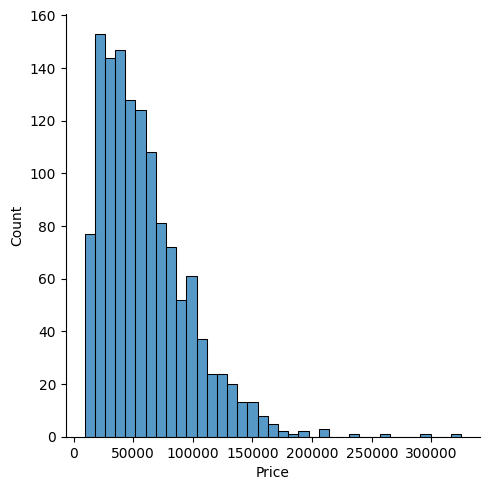

In [129]:
sns.displot(df['Price'])

In [130]:
df['Company'].value_counts() 

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

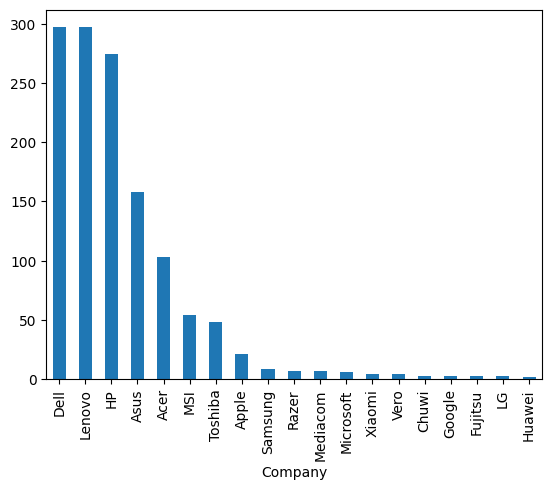

In [131]:
df['Company'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Company', ylabel='Price'>

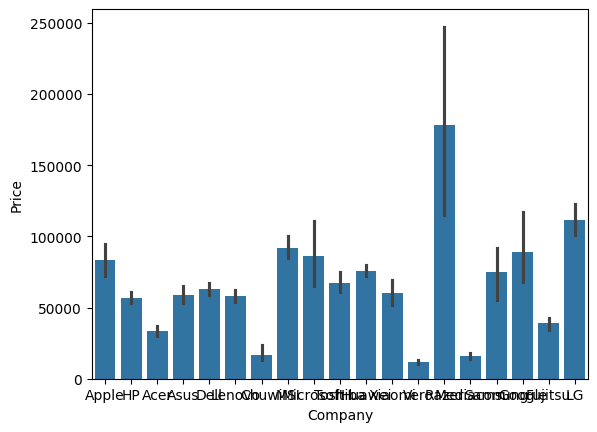

In [132]:
sns.barplot(x = df['Company'], y = df['Price'])

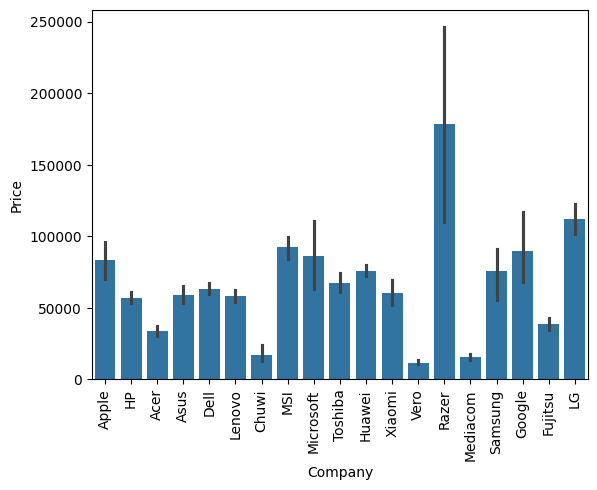

In [133]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [134]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: xlabel='TypeName'>

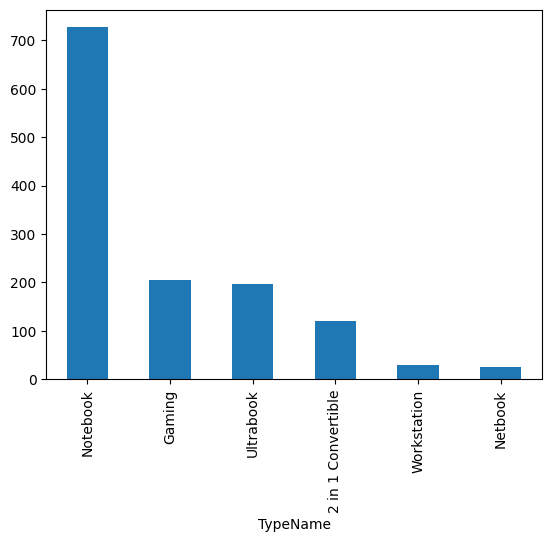

In [135]:
df['TypeName'].value_counts().plot(kind = 'bar')

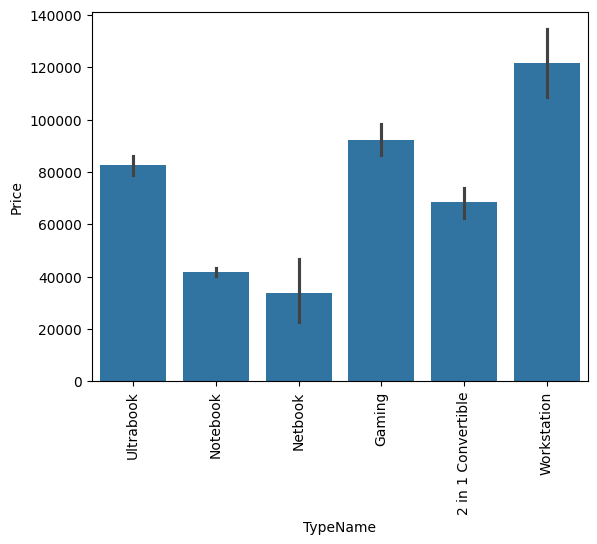

In [136]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

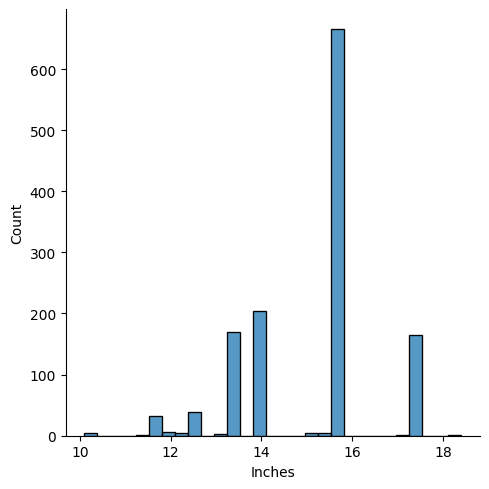

In [137]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

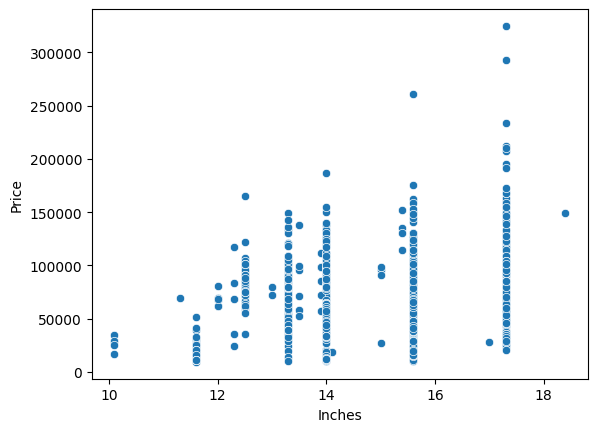

In [138]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [139]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [140]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda ts : 1 if 'Touchscreen' in ts else 0)

In [141]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='TouchScreen'>

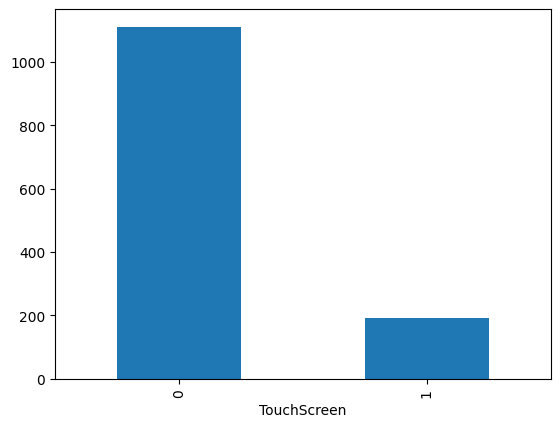

In [142]:
df['TouchScreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

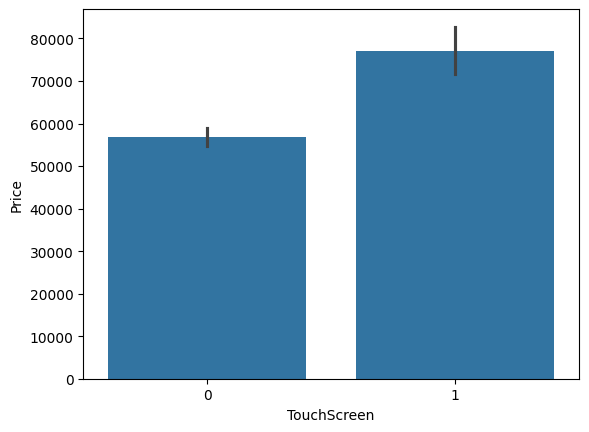

In [143]:
sns.barplot(x = df['TouchScreen'], y = df['Price'])

In [144]:
df['IPS'] = df['ScreenResolution'].apply(lambda ips : 1 if "IPS" in ips else 0)

In [145]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

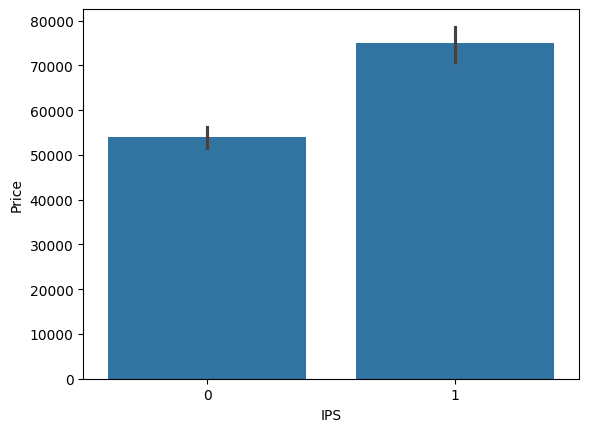

In [146]:
sns.barplot(x = df['IPS'], y = df['Price'])

In [147]:
Resolution = df['ScreenResolution'].str.split('x', expand = True)

In [148]:
df['X_Res'] = Resolution[0]
df['Y_Res'] = Resolution[1]

In [149]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [150]:
df['X_Res'] = df['X_Res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x_res : x_res[0])

In [151]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [152]:
df['X_Res'] = df['X_Res'].astype('int')
df['Y_Res'] = df['Y_Res'].astype('int')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Res             1303 non-null   int32  
 14  Y_Res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [154]:
df.describe()

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_Res,Y_Res
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910,0.147352,0.280123,1894.784344,1070.830391
std,1.426304,5.084665,0.665475,37243.201786,0.354593,0.449231,494.641028,284.519410
min,10.100000,2.000000,0.690000,9270.720000,0.000000,0.000000,1366.000000,768.000000
25%,14.000000,4.000000,1.500000,31914.720000,0.000000,0.000000,1600.000000,900.000000
50%,15.600000,8.000000,2.040000,52054.560000,0.000000,0.000000,1920.000000,1080.000000
75%,15.600000,8.000000,2.300000,79274.246400,0.000000,1.000000,1920.000000,1080.000000
max,18.400000,64.000000,4.700000,324954.720000,1.000000,1.000000,3840.000000,2160.000000


In [155]:
df['PPI'] = ((df['X_Res']**2 + df['Y_Res'])**0.5) / df['Inches']

In [156]:
df['PPI'].astype('float')

0       192.504698
1       108.294170
2       123.094951
3       187.033278
4       192.504698
           ...    
1298    137.162945
1299    240.622649
1300     97.591506
1301     87.582121
1302     87.582121
Name: PPI, Length: 1303, dtype: float64

In [157]:
df.describe()

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_Res,Y_Res,PPI
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910,0.147352,0.280123,1894.784344,1070.830391,127.647101
std,1.426304,5.084665,0.665475,37243.201786,0.354593,0.449231,494.641028,284.519410,37.310099
min,10.100000,2.000000,0.690000,9270.720000,0.000000,0.000000,1366.000000,768.000000,78.975785
25%,14.000000,4.000000,1.500000,31914.720000,0.000000,0.000000,1600.000000,900.000000,110.998915
50%,15.600000,8.000000,2.040000,52054.560000,0.000000,0.000000,1920.000000,1080.000000,123.094951
75%,15.600000,8.000000,2.300000,79274.246400,0.000000,1.000000,1920.000000,1080.000000,137.162945
max,18.400000,64.000000,4.700000,324954.720000,1.000000,1.000000,3840.000000,2160.000000,307.222499


In [158]:
df.drop(columns = ['Inches', 'ScreenResolution', 'X_Res', 'Y_Res'], inplace = True)

In [159]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698


In [160]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [161]:
df['CPU_Name'] = df['Cpu'].apply(lambda x: x.split()[:3]) 

In [162]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,"[Intel, Core, i5]"


In [163]:
df['CPU_Name'].apply(lambda x: x[0]).value_counts()

CPU_Name
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [164]:
df['CPU_Name'] = df['CPU_Name'].apply(lambda x: " ".join(x))

In [165]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5


In [166]:
def get_processor(cpu_name):
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    
    if cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    
    return 'AMD Processor'

In [167]:
df['CPU_Brand'] = df['CPU_Name'].apply(get_processor)

In [168]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,CPU_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU_Brand'>

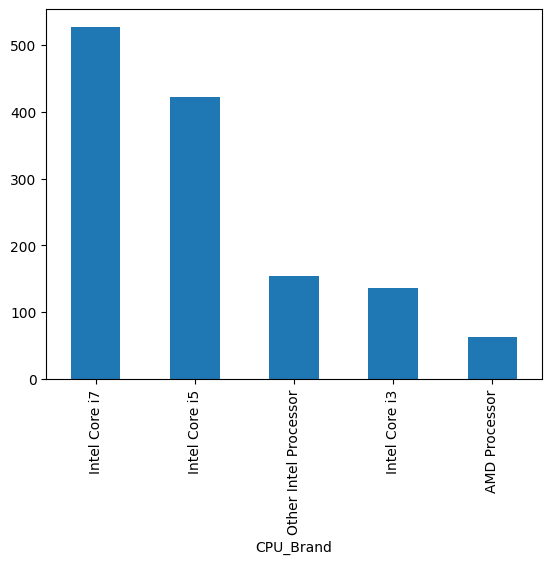

In [169]:
df['CPU_Brand'].value_counts().plot(kind = 'bar')

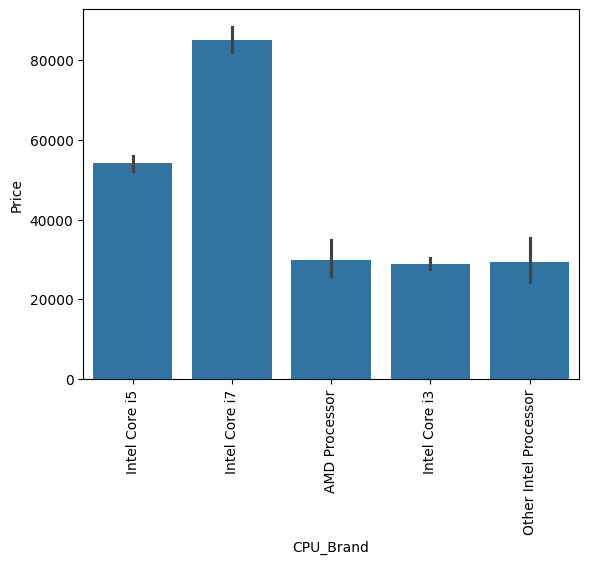

In [170]:
sns.barplot(x = df['CPU_Brand'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [171]:
df.drop(columns = ['Cpu', 'CPU_Name'], inplace = True)

In [172]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5


<Axes: xlabel='Ram'>

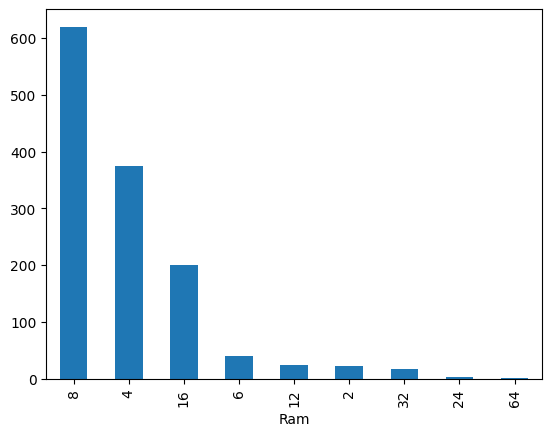

In [173]:
df['Ram'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ram', ylabel='Price'>

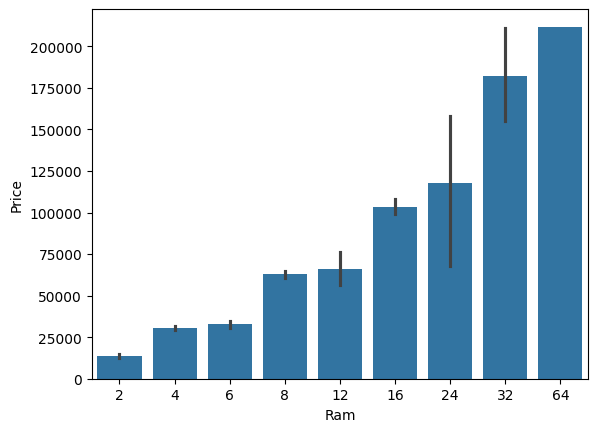

In [174]:
sns.barplot(x = df['Ram'], y = df['Price'])

In [175]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [176]:
df['Memory'].astype(str)

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [177]:
df['Memory'] = df['Memory'].replace('\.0', '', regex = True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
data = df['Memory'].str.split('+', expand = True)

# data[0].value_counts()
# data[1].value_counts()

In [178]:
df['first'] = data[0]
df['second'] = data[1]

In [179]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,first,second
761,Dell,Ultrabook,16,256 SSD,Intel HD Graphics 620,Windows 10,1.18,99047.520,0,0,153.622498,Intel Core i7,256 SSD,None
1076,Lenovo,Notebook,4,1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,52054.560,0,1,123.094951,Intel Core i5,1000 HDD,None
800,HP,Workstation,8,256 SSD,Nvidia Quadro M2200,Windows 10,3.14,110017.872,0,0,123.094951,Intel Core i7,256 SSD,None
265,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.67,42570.720,1,0,123.094951,Intel Core i5,256 SSD,None
700,Dell,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.56,43636.320,0,0,123.094951,Intel Core i5,1000 HDD,None


In [180]:
df['second'].fillna('0', inplace = True)

C:\Users\Deepanshu Sharma\AppData\Local\Temp\ipykernel_48332\2921024885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna('0', inplace = True)


In [181]:
df['L1_HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['L1_SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['L1_Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['L1_Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,first,second,L1_HDD,L1_SSD,L1_Hybrid,L1_Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,128 SSD,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,128 Flash Storage,0,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,256 SSD,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,512 SSD,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,256 SSD,0,0,1,0,0


In [182]:
df['L2_HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['L2_SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['L2_Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['L2_Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,second,L1_HDD,L1_SSD,L1_Hybrid,L1_Flash_Storage,L2_HDD,L2_SSD,L2_Hybrid,L2_Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128 SSD,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128 Flash Storage,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256 SSD,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512 SSD,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256 SSD,0,0,1,0,0,0,0,0,0


In [183]:
df['first'].value_counts()

first
256 SSD              412
1000 HDD             224
500 HDD              132
512 SSD              118
128 SSD               96
256 SSD               88
128 SSD               76
32 Flash Storage      38
512 SSD               20
2000 HDD              16
64 Flash Storage      15
1000 SSD              14
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
1000 SSD               2
512 Flash Storage      2
64 SSD                 1
64 Flash Storage       1
1000 HDD               1
32 HDD                 1
128 HDD                1
240 SSD                1
8 SSD                  1
508 Hybrid             1
Name: count, dtype: int64

In [184]:
df['second'].value_counts()

second
0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [185]:
df['first'] = df['first'].str.strip()
df['second'] = df['second'].str.strip()

In [186]:
df['first'].value_counts()

first
256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: count, dtype: int64

In [187]:
df['second'].value_counts()

second
0              1095
1000 HDD        185
2000 HDD         15
256 SSD           3
500 HDD           2
1000 Hybrid       2
512 SSD           1
Name: count, dtype: int64

In [188]:
df['first'] = df['first'].apply(lambda x: x.split(' ')[0]).astype(int)
df['first'].value_counts()

first
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [189]:
df['second'] = df['second'].apply(lambda x: x.split(' ')[0]).astype('int')
df['second'].value_counts()

second
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [190]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,second,L1_HDD,L1_SSD,L1_Hybrid,L1_Flash_Storage,L2_HDD,L2_SSD,L2_Hybrid,L2_Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [191]:
df['HDD'] = df['first'] * df['L1_HDD'] + df['second'] * df['L2_HDD']
df['SSD'] = df['first'] * df['L1_SSD'] + df['second'] * df['L2_SSD']
df['Hybrid'] = df['first'] * df['L1_Hybrid'] + df['second'] * df['L2_Hybrid']
df['Flash_Storage'] = df['first'] * df['L1_Flash_Storage'] + df['second'] * df['L2_Flash_Storage']

In [192]:
df.drop(columns = ['first', 'second', 'L1_HDD', 'L2_HDD', 'L1_SSD', 'L2_SSD', 'L1_Hybrid', 'L2_Hybrid', 'L1_Flash_Storage', 'L2_Flash_Storage'], inplace = True)
df.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,Flash_Storage
90,Asus,Gaming,8,1000 HDD,AMD Radeon RX 560,Windows 10,2.45,37242.72,0,0,123.094951,AMD Processor,1000,0,0,0


In [193]:
df.drop(columns = ['Memory'], inplace = True)

In [194]:
df.describe()

,Ram,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038734,59870.042910,0.147352,0.280123,127.647101,413.783576,183.732924,8.831926,4.555641
std,5.084665,0.665475,37243.201786,0.354593,0.449231,37.310099,515.818779,186.966903,92.567185,30.274090
min,2.000000,0.690000,9270.720000,0.000000,0.000000,78.975785,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.000000,110.998915,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.040000,52054.560000,0.000000,0.000000,123.094951,0.000000,256.000000,0.000000,0.000000
75%,8.000000,2.300000,79274.246400,0.000000,1.000000,137.162945,1000.000000,256.000000,0.000000,0.000000
max,64.000000,4.700000,324954.720000,1.000000,1.000000,307.222499,2000.000000,1024.000000,1000.000000,512.000000


In [195]:
df.drop(columns = ['Hybrid', 'Flash_Storage'], inplace = True)
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD
660,Dell,Notebook,8,Intel HD Graphics 520,Windows 10,1.56,65481.12,0,0,137.162945,Intel Core i5,0,256


In [196]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [197]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel


In [198]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [199]:
df = df[df['GPU_Brand'] != 'ARM'] 

In [200]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='GPU_Brand', ylabel='Price'>

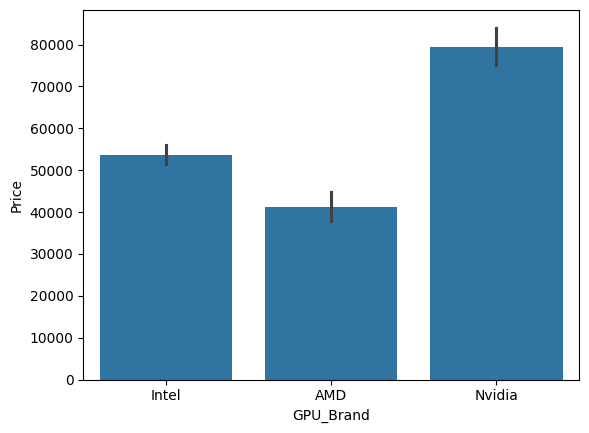

In [201]:
sns.barplot(x = df['GPU_Brand'], y = df['Price'])

In [202]:
df.drop(columns = ['Gpu'], inplace = True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel


In [203]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

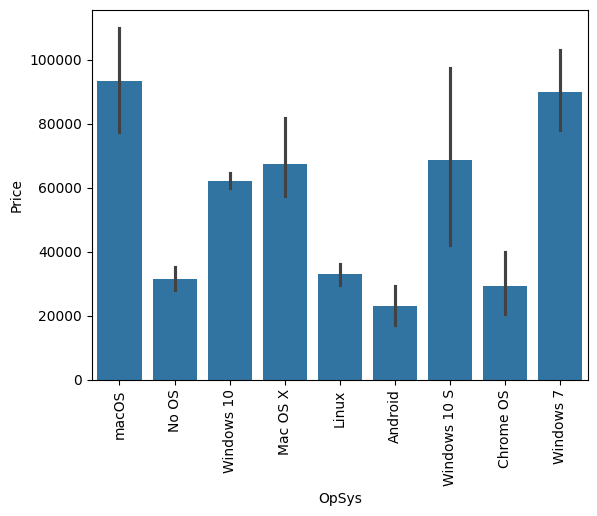

In [204]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [205]:
def get_OS(os_name):
    if os_name == 'Windows 10' or os_name == 'Windows 10 S' or os_name == 'Windows 7':
        return 'Windows'
    
    if os_name == 'macOS' or os_name == 'Mac OS X':
        return 'Mac'
    
    return 'Others / No Os / Linux'

In [206]:
df['OS'] = df['OpSys'].apply(get_OS)

In [207]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,192.504698,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,108.294170,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,123.094951,Intel Core i5,0,256,Intel,Others / No Os / Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,187.033278,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,192.504698,Intel Core i5,0,256,Intel,Mac


In [208]:
df.drop(columns = ['OpSys'], inplace = True)

<Axes: xlabel='OS', ylabel='Price'>

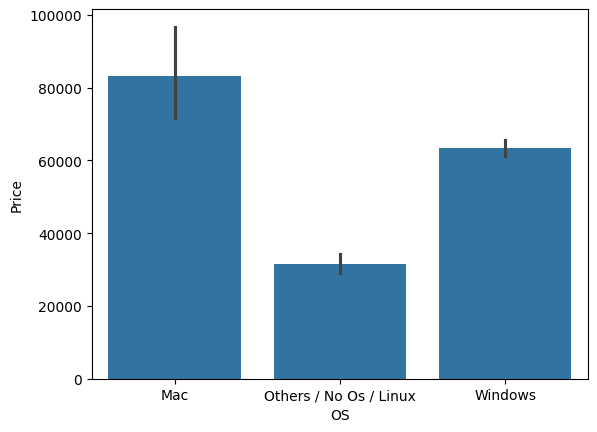

In [209]:
sns.barplot(x = df['OS'], y = df['Price'])

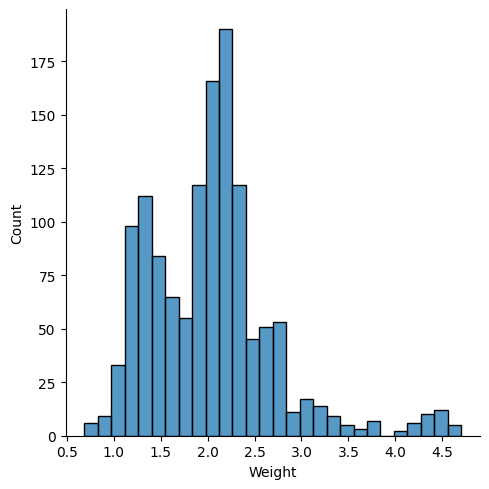

In [210]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

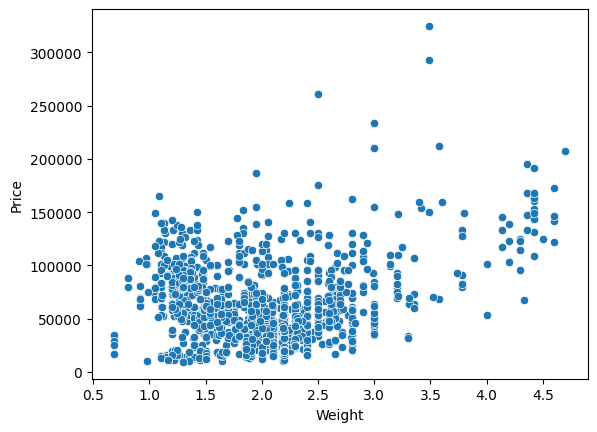

In [211]:
sns.scatterplot(x = df['Weight'], y = df['Price'])

In [212]:
df.describe()

,Ram,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,127.595256,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,37.277453,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,78.975785,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.00000,110.998915,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,123.094951,0.000000,256.000000
75%,8.000000,2.300000,79303.816800,0.000000,1.00000,137.162945,1000.000000,256.000000
max,64.000000,4.700000,324954.720000,1.000000,1.00000,307.222499,2000.000000,1024.000000


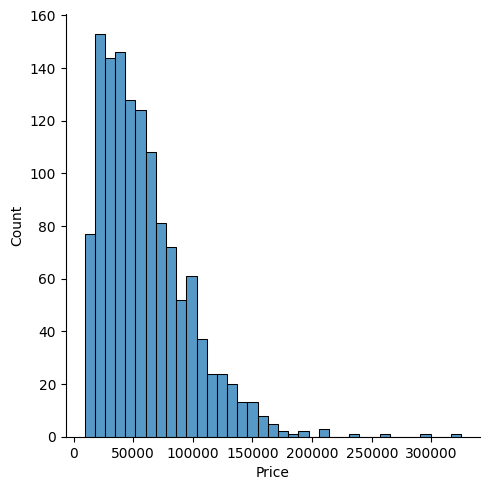

In [213]:
sns.displot(df['Price'])

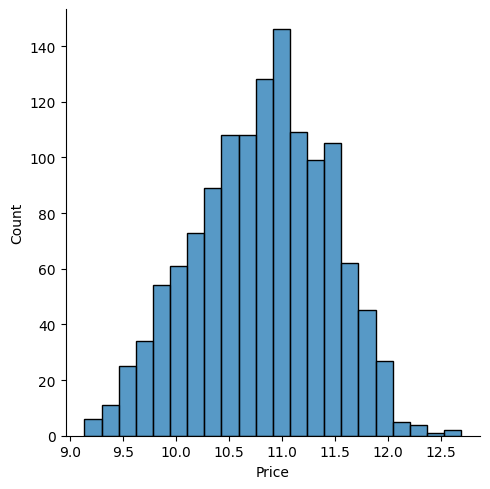

In [214]:
sns.displot(np.log(df['Price']))

In [215]:
X = df.drop(columns = ['Price'])
Y = np.log(df['Price'])

In [216]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,192.504698,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,108.294170,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,123.094951,Intel Core i5,0,256,Intel,Others / No Os / Linux
3,Apple,Ultrabook,16,1.83,0,1,187.033278,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,192.504698,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,137.162945,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,240.622649,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,97.591506,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,87.582121,Intel Core i7,1000,0,AMD,Windows


In [217]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# Splitting into Training & Testing Data

In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 2)

In [219]:
print("Train size:", x_train.shape)
print("Test size:", x_test.shape)

Train size: (1106, 12)
Test size: (196, 12)


In [220]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression

In [221]:
from sklearn.linear_model import LinearRegression

transformed_column = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0, 1, 7, 10, 11])], remainder = 'passthrough')

lr = LinearRegression()

model = Pipeline([('transformed_column', transformed_column), ('lr', lr)])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Linear Regression -> Mean Absolute Error is = ', mean_absolute_error(y_test, y_pred))
print('Linear Regression -> R2 Score is = ', r2_score(y_test, y_pred))

Linear Regression -> Mean Absolute Error is =  0.21022212996041093
Linear Regression -> R2 Score is =  0.8073257430994137


# K-Nearest Neighbors

In [222]:
from sklearn.neighbors import KNeighborsRegressor

transformed_column = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0, 1, 7, 10, 11])], remainder = 'passthrough')

knn = KNeighborsRegressor(n_neighbors = 4)

model = Pipeline([('transformed_column', transformed_column), ('knn', knn)])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('K-Nearest Neighbors -> Mean Absolute Error is = ', mean_absolute_error(y_test, y_pred))
print('K-Nearest Neighbors -> R2 Score is = ', r2_score(y_test, y_pred))

K-Nearest Neighbors -> Mean Absolute Error is =  0.19499211887645124
K-Nearest Neighbors -> R2 Score is =  0.799913066965906


# Desision Tree Regressor

In [223]:
from sklearn.tree import DecisionTreeRegressor

transformed_column = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0, 1, 7, 10, 11])], remainder = 'passthrough')

d_tree = DecisionTreeRegressor(max_depth = 8)

model = Pipeline([('transformed_column', transformed_column), ('d_tree', d_tree)])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Decision Tree Regressor -> Mean Absolute Error is = ', mean_absolute_error(y_test, y_pred))
print('Decision Tree Regressor -> R2 Score is = ', r2_score(y_test, y_pred))

Decision Tree Regressor -> Mean Absolute Error is =  0.1829929537429265
Decision Tree Regressor -> R2 Score is =  0.8415649340334695


# Random Forest Regressor

In [224]:
from sklearn.ensemble import RandomForestRegressor

transformed_column = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0, 1, 7, 10, 11])], remainder = 'passthrough')

r_tree = RandomForestRegressor(n_estimators = 100, random_state = 3, max_samples = 0.5, max_features = 0.75, max_depth = 15)

model = Pipeline([('transformed_column', transformed_column), ('r_tree', r_tree)])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Random Forest Regressor -> Mean Absolute Error is = ', mean_absolute_error(y_test, y_pred))
print('Random Forest Regressor -> R2 Score is = ', r2_score(y_test, y_pred))

Random Forest Regressor -> Mean Absolute Error is =  0.15751604016986218
Random Forest Regressor -> R2 Score is =  0.8871020774496275


# Sample Test Case

In [225]:
new = np.array([['Apple', 'Ultrabook', 8, 1.34, 0, 0, 108.294170, 'Intel Core i5', 0, 0, 'Intel', 'Mac']])
ans = model.predict(new)
print('Expected value of Laptop for this configuration will be = ' + str(*np.exp(ans)))
print('Price of Laptop for this configuration will lie between = ' + str(*np.exp(ans) * 0.95) + " to " + str(*np.exp(ans) * 1.05))

Expected value of Laptop for this configuration will be = 54079.46265627414
Price of Laptop for this configuration will lie between = 51375.489523460434 to 56783.435789087845


c:\Users\Deepanshu Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


# Exporting the model

In [226]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [227]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,87.582121,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,123.094951,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,117.782852,Other Intel Processor,0,0,Intel,Others / No Os / Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,123.094951,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,123.094951,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,87.582121,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,123.094951,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,87.582121,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,87.582121,Intel Core i3,2000,0,Nvidia,Others / No Os / Linux
